### Project 1

Project description: 
- Read data into Jupyter notebook, use pandas to import data into a data frame
- preprocess data: explore data, address missing data, categorical data, if there is any, and data scaling. Justify the type of scaling used in this project. 
- train your dataset using all the linear regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best repressor for this dataset and train your model on the entire dataset using the best parameters and predict the market price for the test_set.
- submit IPython notebook. Use markdown to provide an inline report for this project.

### Installing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from matplotlib.colors import ListedColormap

##### <font color = 'red'> Important note: All the group members should participate in completing this project.  This includes coding, preparing report and testing the models. 

In [2]:
data = pd.read_csv('bitcoin_dataset.csv')
test = pd.read_csv('test_set.csv')

#creating a dummy data file for later use 
data2 = pd.read_csv('bitcoin_dataset.csv')

### Reading the files

In [3]:
data.head(5)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


### Data Shape

In [4]:
data.shape,test.shape,data.dtypes # 2906 rows and 24 columns

((2906, 24),
 (14, 23),
 Date                                                    object
 btc_market_price                                       float64
 btc_total_bitcoins                                     float64
 btc_market_cap                                         float64
 btc_trade_volume                                       float64
 btc_blocks_size                                        float64
 btc_avg_block_size                                     float64
 btc_n_orphaned_blocks                                    int64
 btc_n_transactions_per_block                           float64
 btc_median_confirmation_time                           float64
 btc_hash_rate                                          float64
 btc_difficulty                                         float64
 btc_miners_revenue                                     float64
 btc_transaction_fees                                   float64
 btc_cost_per_transaction_percent                       float64
 btc_cost_per_tr

### DATA PREPOCESSING 

In [5]:
data.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344255e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866150e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.265250e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


#### Data Manipulation 1 : Dealing with Null Values

In [6]:
#checking missing values in data set 
data.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [7]:
null_data = data[data.isnull().any(axis=1)]
missingper = null_data.count()/data.count()
print("The percentage of Data missing is :")
missingper
# Almost 4% of records have missing values 

The percentage of Data missing is :


Date                                                   0.039573
btc_market_price                                       0.039573
btc_total_bitcoins                                     0.030566
btc_market_cap                                         0.039573
btc_trade_volume                                       0.032582
btc_blocks_size                                        0.029892
btc_avg_block_size                                     0.039573
btc_n_orphaned_blocks                                  0.039573
btc_n_transactions_per_block                           0.039573
btc_median_confirmation_time                           0.035591
btc_hash_rate                                          0.039573
btc_difficulty                                         0.034256
btc_miners_revenue                                     0.039573
btc_transaction_fees                                   0.036257
btc_cost_per_transaction_percent                       0.039573
btc_cost_per_transaction                

In [8]:
# using ffill method 

data = data.fillna(method='ffill')

What method to use for imputation and why ? 

- The total amount of data that is missing is approx 4% and hence it can be removed if necessary, however, our case we have imputed the values using fillna and filled the same using a forwardfill.

- We chose ffill method because this is a timeseries data and hence to impute the value with a median or average would add more noise, with ffill the missing value will take the value of previous row and hence may add less noise. 

### Data Manipulation 2 : Capturing Month wise variance

In [9]:
# Converting the date variable to date format
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
Date                                                   2906 non-null datetime64[ns]
btc_market_price                                       2906 non-null float64
btc_total_bitcoins                                     2906 non-null float64
btc_market_cap                                         2906 non-null float64
btc_trade_volume                                       2906 non-null float64
btc_blocks_size                                        2906 non-null float64
btc_avg_block_size                                     2906 non-null float64
btc_n_orphaned_blocks                                  2906 non-null int64
btc_n_transactions_per_block                           2906 non-null float64
btc_median_confirmation_time                           2906 non-null float64
btc_hash_rate                                          2906 non-null float64
btc_difficulty                           

In [11]:
# creating variables for Month and Year from the data set.
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 26 columns):
Date                                                   2906 non-null datetime64[ns]
btc_market_price                                       2906 non-null float64
btc_total_bitcoins                                     2906 non-null float64
btc_market_cap                                         2906 non-null float64
btc_trade_volume                                       2906 non-null float64
btc_blocks_size                                        2906 non-null float64
btc_avg_block_size                                     2906 non-null float64
btc_n_orphaned_blocks                                  2906 non-null int64
btc_n_transactions_per_block                           2906 non-null float64
btc_median_confirmation_time                           2906 non-null float64
btc_hash_rate                                          2906 non-null float64
btc_difficulty                           

## Data Visualizations & Selecting Correct functional form

- Plotting the charts for various variables 
- Plotting across logs of variables vs years

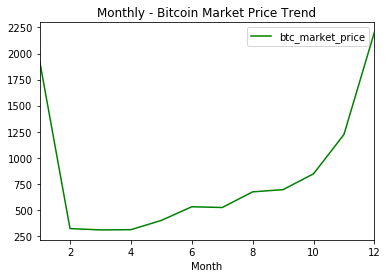

In [12]:
# plotting the log of btc market price across year 
data1 = data.groupby(["Month"],as_index= False).mean()
data1.plot(x=["Month"],y='btc_market_price',kind='line',color='green'),plt.title('Monthly - Bitcoin Market Price Trend')
plt.show()

C:\python\lib\site-packages\matplotlib\axes\_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


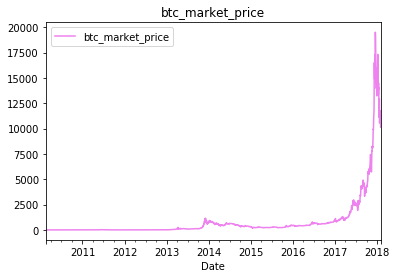

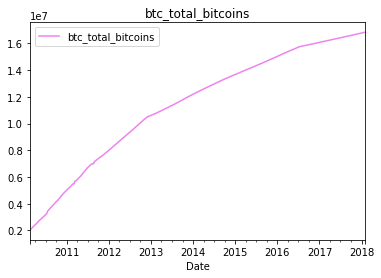

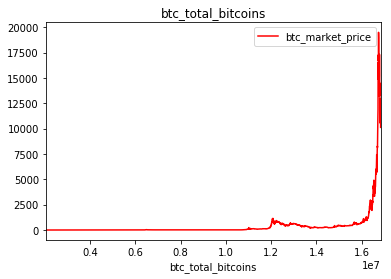

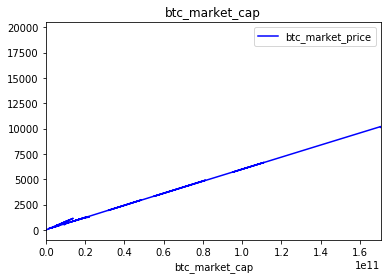

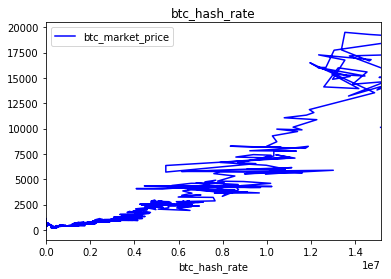

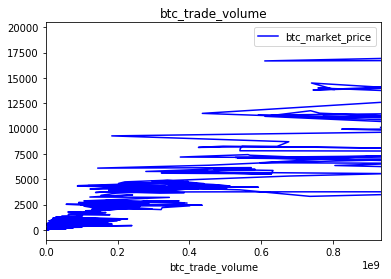

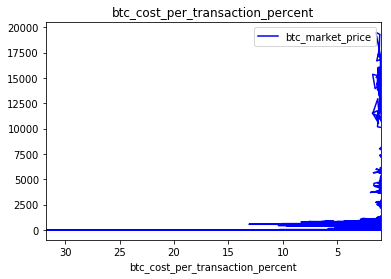

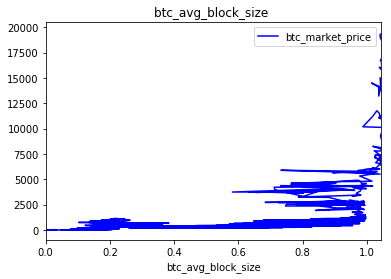

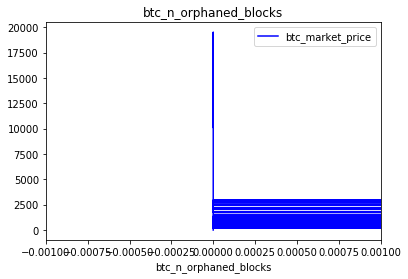

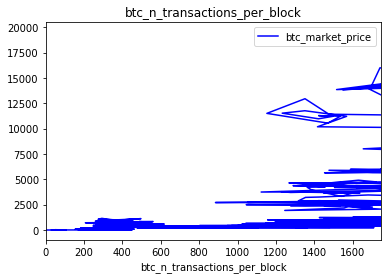

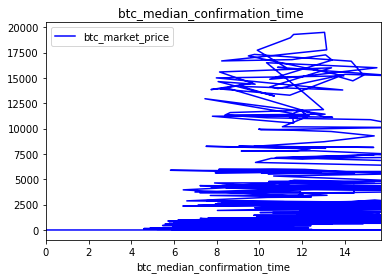

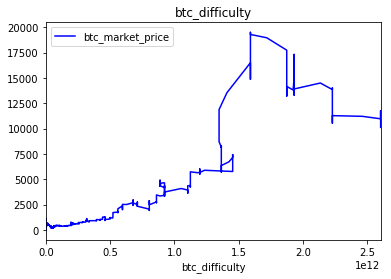

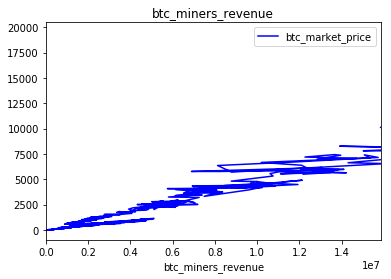

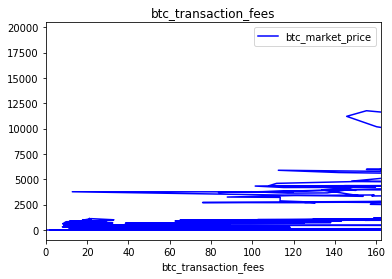

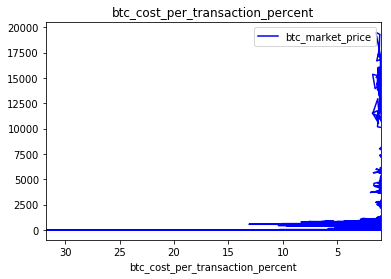

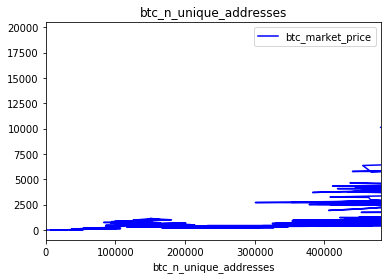

In [13]:
#plotting the btc_market_price and btc_total_bitcoins
data.plot(x='Date',y='btc_market_price',kind='line',color='violet'),plt.title('btc_market_price')
data.plot(x='Date',y='btc_total_bitcoins',kind='line',color='violet'),plt.title('btc_total_bitcoins')
data.plot(x='btc_total_bitcoins',y='btc_market_price',kind='line',color='red'),plt.title('btc_total_bitcoins')
data.plot(x='btc_market_cap',y='btc_market_price',kind='line',color='blue'),plt.title('btc_market_cap')
data.plot(x='btc_hash_rate',y='btc_market_price',kind='line',color='blue'),plt.title('btc_hash_rate')
data.plot(x='btc_trade_volume',y='btc_market_price',kind='line',color='blue'),plt.title('btc_trade_volume')
data.plot(x='btc_cost_per_transaction_percent',y='btc_market_price',kind='line',color='blue'),plt.title('btc_cost_per_transaction_percent')
data.plot(x='btc_avg_block_size',y='btc_market_price',kind='line',color='blue'),plt.title('btc_avg_block_size ')
data.plot(x='btc_n_orphaned_blocks',y='btc_market_price',kind='line',color='blue'),plt.title('btc_n_orphaned_blocks')
data.plot(x='btc_n_transactions_per_block',y='btc_market_price',kind='line',color='blue'),plt.title('btc_n_transactions_per_block')
data.plot(x='btc_median_confirmation_time',y='btc_market_price',kind='line',color='blue'),plt.title('btc_median_confirmation_time ')
data.plot(x='btc_difficulty',y='btc_market_price',kind='line',color='blue'),plt.title('btc_difficulty')
data.plot(x='btc_miners_revenue',y='btc_market_price',kind='line',color='blue'),plt.title('btc_miners_revenue')
data.plot(x='btc_transaction_fees',y='btc_market_price',kind='line',color='blue'),plt.title('btc_transaction_fees')
data.plot(x='btc_cost_per_transaction_percent',y='btc_market_price',kind='line',color='blue'),plt.title('btc_cost_per_transaction_percent')
data.plot(x='btc_n_unique_addresses',y='btc_market_price',kind='line',color='blue'),plt.title('btc_n_unique_addresses')
plt.show()

In [1]:
data["log_btc_market_price"] = np.log(data.btc_market_price)
data["log_btc_total_bitcoins"] = np.log(data.btc_total_bitcoins)
data.head()

NameError: name 'np' is not defined

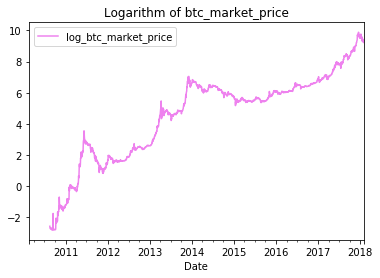

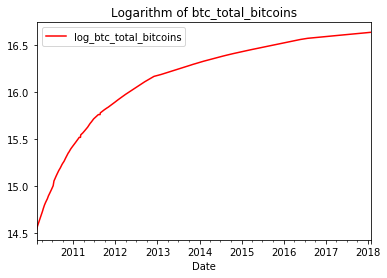

In [15]:
data.plot(x='Date',y='log_btc_market_price',kind='line',color='violet'),plt.title('Logarithm of btc_market_price')
data.plot(x='Date',y='log_btc_total_bitcoins',kind='line',color='red'),plt.title('Logarithm of btc_total_bitcoins')
plt.show()

In [16]:
data_dummies= pd.get_dummies(data,columns=['Month'])
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 39 columns):
Date                                                   2906 non-null datetime64[ns]
btc_market_price                                       2906 non-null float64
btc_total_bitcoins                                     2906 non-null float64
btc_market_cap                                         2906 non-null float64
btc_trade_volume                                       2906 non-null float64
btc_blocks_size                                        2906 non-null float64
btc_avg_block_size                                     2906 non-null float64
btc_n_orphaned_blocks                                  2906 non-null int64
btc_n_transactions_per_block                           2906 non-null float64
btc_median_confirmation_time                           2906 non-null float64
btc_hash_rate                                          2906 non-null float64
btc_difficulty                           

In [17]:
# creating X and y data set
y = data_dummies['btc_market_price']
X = data_dummies.drop(['Date','Year','Month_12','btc_market_price','log_btc_total_bitcoins','log_btc_market_price'],axis = 1)

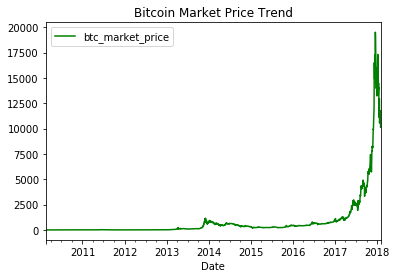

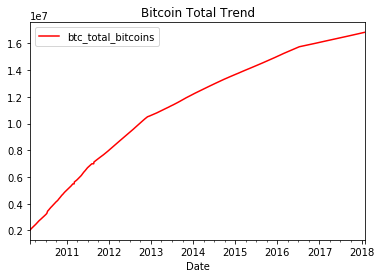

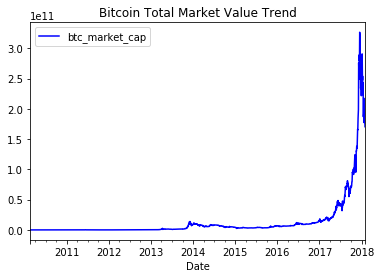

In [18]:
# Plotting trend and analyzing the rise of Bitcoin over the last 1 year
data_dummies.plot(x='Date',y='btc_market_price',kind='line',color='green'),plt.title('Bitcoin Market Price Trend')
data_dummies.plot(x='Date',y='btc_total_bitcoins',kind='line',color='red'),plt.title('Bitcoin Total Trend')
data_dummies.plot(x='Date',y='btc_market_cap',kind='line',color='blue'),plt.title('Bitcoin Total Market Value Trend')
plt.show()

### Observations 

- After removing the missing data, we observe that the trend lines pretty much remain the same. 
- There is an increasing trend for total bitcoin
- The bitcoin trend has pretty much remained the same from 2010 to 2017, however has spiked high since 2017 end to end.
- The current market cap value of all minded bitcoins is about 200B USD , the max was about 300B USD
- we see across all plots above that the trend is increasing across various variables. 

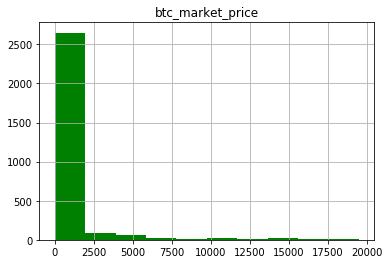

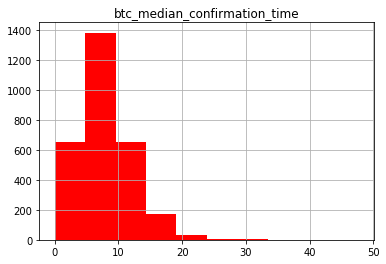

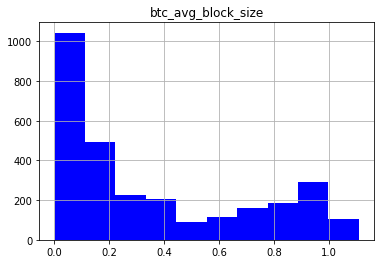

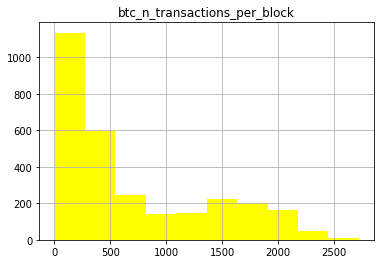

In [19]:
#plotting relavent histograms data
data_dummies.hist('btc_market_price',color='green') 
data_dummies.hist('btc_median_confirmation_time',color='red')
data_dummies.hist('btc_avg_block_size',color='blue')
data_dummies.hist('btc_n_transactions_per_block',color='yellow')
plt.show()

- Market price has been highly skwed and prices have mostly remined lower than 2500 USD
- Median time for transactions to be accepted into the block chain ranges between 1 to 35mins.

### Data Manipulation 4 : Min-Max Scaling

We observe that the scale of all variable is different and hence needs to scaled together. Hence we used the min and Max Scaling.

1. Why Min - Max
    - Because it keeps the structure of data intact
2. Why not normalization - 
    - Because no data is normally distributed

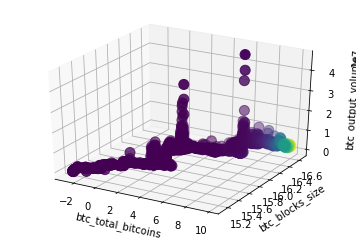

In [20]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data_dummies['log_btc_market_price'], data_dummies['log_btc_total_bitcoins'], data_dummies['btc_output_volume'], c = data_dummies['btc_market_price'], s=100)
ax.set_xlabel('btc_total_bitcoins')
ax.set_ylabel('btc_blocks_size')
ax.set_zlabel('btc_output_volume')
plt.show()

## The below graph shows the need to scale the data

In [21]:
# creating feature set and target set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

print("The shape of Target set is :"+str(X_train.shape))
print("The shape of feature set is :"+str(y_train.shape))
print("The shape of Target set is :"+str(X_test.shape))
print("The shape of feature set is :"+str(y_test.shape))

The shape of Target set is :(2324, 33)
The shape of feature set is :(2324,)
The shape of Target set is :(582, 33)
The shape of feature set is :(582,)


In [22]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 10)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [24]:
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

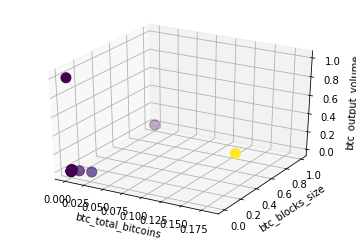

In [28]:
# plotting a 3D scatter plot after scaling
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train[1], X_train[3], X_train[0], c = X_train[1], s=100)
ax.set_xlabel('btc_total_bitcoins')
ax.set_ylabel('btc_blocks_size')
ax.set_zlabel('btc_output_volume')
plt.show()

## The below graph shows the need to scale the data

### Linear Regression - MAE/MSE/RMSE & Cross-Validation Score

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
y_predict=lr.predict(X_test)

In [34]:
lr.score(X_test,y_test)

0.99994271734539775

In [35]:
coeffecients = pd.DataFrame(lr.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
btc_total_bitcoins,-74.072599
btc_market_cap,18723.880166
btc_trade_volume,47.252894
btc_blocks_size,-3449.318333
btc_avg_block_size,30.764704
btc_n_orphaned_blocks,-5.855623
btc_n_transactions_per_block,-25.913162
btc_median_confirmation_time,33.937926
btc_hash_rate,-448.376848
btc_difficulty,189.069715


In [36]:
predictions = lr.predict(X_test)

In [37]:
from sklearn import metrics
import numpy as np
print('MAE for test data set:', metrics.mean_absolute_error(y_test, predictions))
print('MSE for test data set :', metrics.mean_squared_error(y_test, predictions))
print('RMSE for test data set:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE for test data set: 9.4457344733
MSE for test data set : 213.577780399
RMSE for test data set: 14.6143005443


In [38]:
from sklearn import metrics
print('MAE for train data set:', metrics.mean_absolute_error(y_train, lr.predict( X_train)))
print('MSE for train data set :', metrics.mean_squared_error(y_train, lr.predict( X_train)))
print('RMSE for train data set:', np.sqrt(metrics.mean_squared_error(y_train, lr.predict( X_train))))

MAE for train data set: 9.76963838744
MSE for train data set : 218.527637052
RMSE for train data set: 14.7826803068


In [39]:
#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, data_dummies.drop(['btc_market_price','Date','log_btc_market_price','log_btc_total_bitcoins'],axis=1), data_dummies['btc_market_price'],cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation scroe: {:.2f}".format(scores.mean()))

Cross validation scores: [ -5.16439184e+06   8.86939803e-01   9.04545151e-01   9.89628431e-01
   9.61529684e-01]
Average cross-validation scroe: -1032877.62


### Ridge - Linear Regression

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [41]:
ridge= Ridge(alpha=5 , max_iter= 10000)
param_grid = {'alpha':[0.001,0.05,0.1,1,10,100],
             'max_iter':[1,10,100,1000,10000]}

In [42]:
linridge = Ridge().fit(X_train, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))
print('MSE for train data set :', metrics.mean_squared_error(y_train, linridge.predict( X_train)))

ridge regression linear model intercept: 91.4161794546227
ridge regression linear model coeff:
[ -2.33139124e+02   7.35494340e+03   1.07432516e+03  -5.40532326e+01
   1.19367250e+02   1.44783236e+01   4.95872702e+02   1.63462404e+02
   9.90129607e+02   2.07414965e+03   5.56761473e+03   8.59534409e+01
  -3.11197692e+00   1.12071109e+03   3.63843308e+02  -8.43000692e+01
  -1.16218036e+02  -4.45381970e+02  -3.73397319e+02  -1.11361465e+02
  -1.54159981e+02   2.86318669e+03  -1.01316146e+02  -8.95804335e+01
  -8.23282008e+01  -8.83821455e+01  -9.76308351e+01  -1.13269027e+02
  -8.15135351e+01  -4.91182801e+01  -4.64217581e+01  -4.03812982e+01
  -3.73122049e+01]
R-squared score (training): 0.997
R-squared score (test): 0.994
Number of non-zero features: 33
MSE for train data set : 19992.1551775


In [43]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train, y_train)
    r2_train = linridge.score(X_train, y_train)
    r2_test = linridge.score(X_test, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
    r-squared training: {:.2f}, r-squared test: {:.2f}\n'
    .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 29,     r-squared training: 1.00, r-squared test: 1.00

Alpha = 1.00
num abs(coeff) > 1.0: 33,     r-squared training: 1.00, r-squared test: 0.99

Alpha = 10.00
num abs(coeff) > 1.0: 32,     r-squared training: 0.98, r-squared test: 0.98

Alpha = 20.00
num abs(coeff) > 1.0: 33,     r-squared training: 0.97, r-squared test: 0.98

Alpha = 50.00
num abs(coeff) > 1.0: 33,     r-squared training: 0.93, r-squared test: 0.94

Alpha = 100.00
num abs(coeff) > 1.0: 33,     r-squared training: 0.86, r-squared test: 0.88

Alpha = 1000.00
num abs(coeff) > 1.0: 32,     r-squared training: 0.46, r-squared test: 0.49



In [44]:
# finding best alpha by gridsearch
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 100, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

grid_search= GridSearchCV(ridge,param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Best parameters: {'alpha': 0.001}
Best cross-validation score: 1.00


{'alpha': 0.001}

In [46]:
# Ridge model with alpha 0.001

from sklearn.linear_model import Ridge


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=0.001).fit(X_train, y_train)

   
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('MSE for train data set :', metrics.mean_squared_error(y_train, linridge.predict( X_train)))

ridge regression linear model intercept: 1.635556091325725
ridge regression linear model coeff:
[ -6.88940984e+01   1.85463370e+04   4.78079801e+01  -3.12688868e+03
   2.29282516e+01  -5.00946982e+00  -3.24280314e+01   3.72328999e+01
  -5.08907747e+02   2.83475039e+02   5.44864662e+02  -2.10681347e+02
   1.48106021e+00   4.16258811e+02   1.39586793e+02   5.68100061e+01
   3.25710893e+03  -3.51897619e+01   1.58226766e+01  -1.32014558e+00
  -3.24766020e+00   1.11294766e+02  -5.63407379e+00  -4.56627757e+00
  -4.37498643e-02  -6.32362033e+00  -4.10649808e+00  -4.05443280e+00
  -1.30180889e+00   1.93709357e+00   5.19456105e-01   1.55295842e+00
   4.16881740e+00]
R-squared score (training): 1.000
R-squared score (test): 1.000
MSE for train data set : 221.200905175


### Lasso- Linear Regression

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [48]:
linlasso = Lasso().fit(X_train, y_train)
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: -7.061201482558431
lasso regression linear model coeff:
[  2.67087357e+00   1.87594352e+04   0.00000000e+00   9.17967842e-01
   4.83898558e+00   0.00000000e+00   9.09468042e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   3.64901554e+01   0.00000000e+00
   0.00000000e+00   5.30321935e+02   8.39334032e+01   0.00000000e+00
   1.00351261e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00   3.14925190e+01  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
   0.00000000e+00]
Non-zero features: 10
R-squared score (training): 1.000
R-squared score (test): 1.000

Features with non-zero weight (sorted by absolute magnitude):
	btc_market_cap, 18759.435
	btc_cost_per_transaction, 530.322
	btc_n_unique_addresses, 83.933
	btc_miners_revenue, 36.490
	btc_estimated_transaction_volume_usd, 31.493
	btc_n_transact

In [49]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [1, 5, 10, 100, 500]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train, y_train)
    r2_train = linlasso.score(X_train, y_train)
    r2_test = linlasso.score(X_test, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 1.00
Features kept: 10, r-squared training: 1.00, r-squared test: 1.00

Alpha = 5.00
Features kept: 4, r-squared training: 1.00, r-squared test: 1.00

Alpha = 10.00
Features kept: 4, r-squared training: 1.00, r-squared test: 1.00

Alpha = 100.00
Features kept: 2, r-squared training: 0.89, r-squared test: 0.89

Alpha = 500.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01



In [50]:
lasso= Lasso(alpha=5 , max_iter= 1000)
param_grid = {'alpha':[0.01,1,2,5,10],
             'max_iter':[1000,10000]}

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(Lasso(max_iter = 10000), param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

grid_search= GridSearchCV(lasso,param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'alpha': 0.01}

In [52]:
from sklearn.cross_validation import cross_val_score

C:\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [53]:
scores = cross_val_score(lasso, X, y,cv=5)
print("Cross validation scores: {}".format(scores))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Cross validation scores: [ -5.67474041e+03   2.99872565e-01   8.48549291e-01   9.47887004e-01
   9.63825941e-01]
Best parameters: {'alpha': 0.01}
Best cross-validation score: 1.00


C:\python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [54]:
from sklearn.linear_model import Lasso

linlasso = Lasso(alpha=0.01,max_iter=10000).fit(X_train_scaled, y_train)
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('MSE for train data set :', metrics.mean_squared_error(y_train, linlasso.predict( X_train_scaled)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: -18.546729255352034
lasso regression linear model coeff:
[  2.34510131e+01   1.87885542e+04  -4.22739707e+00  -2.32659506e+00
  -5.61346246e+01  -1.69529607e-01  -8.82138210e+01   4.48483228e+01
  -4.66932998e+02   2.36993291e+02   2.09325449e+02  -8.57100857e+01
   6.42607154e+00   5.01477757e+02   9.86475642e+01  -1.04416154e+02
   5.40389876e+01   5.77038057e+01   1.90641417e+02  -4.62717072e+00
  -1.99237409e+01   1.89112866e+02  -4.52703240e+00   2.00505456e+00
   4.63932648e+00   4.90882194e-01  -4.67936409e-01   1.56934317e-01
   9.27324397e-01   1.33032101e+00   7.49267751e-01   2.00841996e+00
   3.00737174e+00]
Non-zero features: 33
R-squared score (training): 1.000
R-squared score (test): 1.000

MSE for train data set : 366.198056234
Features with non-zero weight (sorted by absolute magnitude):
	btc_market_cap, 18788.554
	btc_cost_per_transaction, 501.478
	btc_hash_rate, -466.933
	btc_difficulty, 236.993
	btc_miners_revenue, 209.325
	b

### K Nearest Neighbor Classifier and Regression

In [55]:
#checking missing values in data set 
data2.isnull().sum()

# data.columns.values,test.columns.values
data2=data2.dropna()
data2.shape,data2['Date'].dtypes

#converting the Date type from object Type to Date type
data2['Date'] = pd.to_datetime(data2['Date'])
data2.dtypes

Date                                                   datetime64[ns]
btc_market_price                                              float64
btc_total_bitcoins                                            float64
btc_market_cap                                                float64
btc_trade_volume                                              float64
btc_blocks_size                                               float64
btc_avg_block_size                                            float64
btc_n_orphaned_blocks                                           int64
btc_n_transactions_per_block                                  float64
btc_median_confirmation_time                                  float64
btc_hash_rate                                                 float64
btc_difficulty                                                float64
btc_miners_revenue                                            float64
btc_transaction_fees                                          float64
btc_cost_per_transac

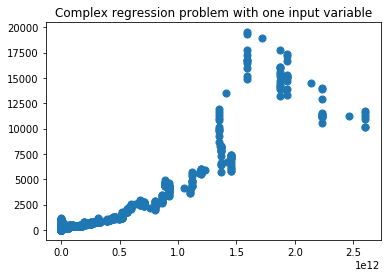

The shape of Target set is :(2093, 22)
The shape of feature set is :(2093, 1)
The shape of Target set is :(698, 22)
The shape of feature set is :(698, 1)


In [56]:
# creating feature set and target set
X = data2.as_matrix(['btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'])
Y = data2.as_matrix(['btc_market_price'])
#X = sc.fit_transform(X)
#Y = sc.fit_transform(Y)
#columns

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
#Y = scaler.fit_transform(Y)
# we must apply the scaling to the test set that we computed for the training set

plt.figure()
plt.title('Complex regression problem with one input variable')
plt.scatter(X[:,9], Y, marker= 'o', s=50)
plt.show()

X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

print("The shape of Target set is :"+str(X_train.shape))
print("The shape of feature set is :"+str(Y_train.shape))
print("The shape of Target set is :"+str(X_test.shape))
print("The shape of feature set is :"+str(Y_test.shape))

In [57]:
# creating categorical variables 
data2['class'] = 4
data2['class'][(data['btc_market_price'] <5000)] = 1
data2['class'][(data['btc_market_price'] >5000) & (data['btc_market_price'] <10000)] = 2
data2['class'][(data['btc_market_price'] >10000) & (data['btc_market_price'] <15000)] = 3

C:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

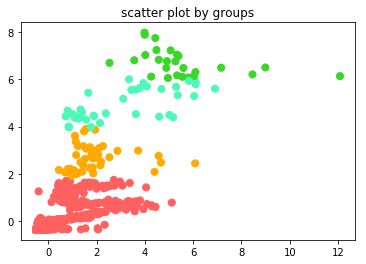

The shape of Feature set is :(2093, 23)
The shape of Target set is :(2093,)
The shape of Feature test set is :(698, 23)
The shape of Target tes set is :(698,)


In [59]:
# creating feature set and target set
X = data2.as_matrix(['btc_market_price','btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'])
Y = np.array(data2['class'])
X = sc.fit_transform(X)
#columns

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
#Y = scaler.fit_transform(Y)
# we must apply the scaling to the test set that we computed for the training set

# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

plt.figure()
plt.title('scatter plot by groups')
plt.scatter(X[:,12], X[:,0],c=Y,cmap=cm_dark, marker= 'o', s=50,label=Y)
plt.show()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

print("The shape of Feature set is :"+str(X_train.shape))
print("The shape of Target set is :"+str(Y_train.shape))
print("The shape of Feature test set is :"+str(X_test.shape))
print("The shape of Target tes set is :"+str(Y_test.shape))

In [60]:
from sklearn.neighbors import KNeighborsClassifier 

# Using KNN to classify the glasses 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

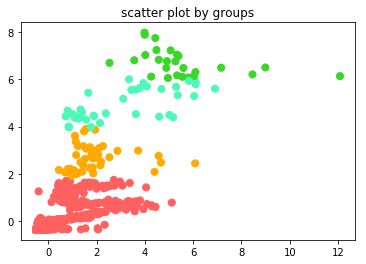

In [61]:
#verifying shape and size before decision boundry 
X = data2.as_matrix(['btc_transaction_fees','btc_market_price'])
X = sc.fit_transform(X)
#X.shape
Y = np.array(data2['class'])
X.shape,Y.shape
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y)
#np.unique(y_test)

plt.figure()
plt.title('scatter plot by groups')
plt.scatter(X[:,0], X[:,1],c=Y,cmap=cm_dark, marker= 'o', s=50,label=Y)
plt.show()

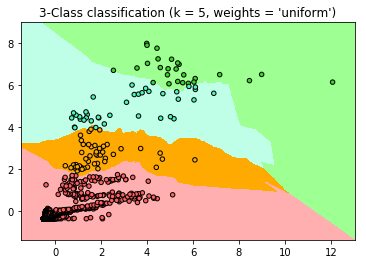

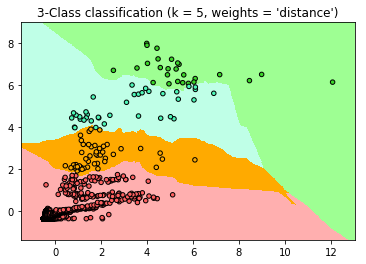

In [62]:
# plotting the decision boundries for the data 

# note : decision boundry is 2D ! hence 2D features only ! 

h = .02  # step size in the mesh
n_neighbors = 5 # No of neighbours
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"% (n_neighbors, weights))

plt.show()

In [63]:
# Checking results with KNN 

X = data2.as_matrix(['btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'])
Y = data2.as_matrix(['btc_market_price'])

from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.333, random_state=20)

knnreg = KNeighborsRegressor(n_neighbors = 1).fit(X_train, y_train)
print('R-squared test score: {:.3f}'.format(knnreg.score(X_test, y_test)))

R-squared test score: 0.999


In [64]:
for i in range (1,10):
    knnreg = KNeighborsRegressor(n_neighbors = i).fit(X_train, y_train)
    
    w=knnreg.score(X_test,y_test)
    print(" The Different accuracy values are printed below : ")
    print(i,w)

 The Different accuracy values are printed below : 
1 0.99872861441
 The Different accuracy values are printed below : 
2 0.998434695797
 The Different accuracy values are printed below : 
3 0.997932170512
 The Different accuracy values are printed below : 
4 0.99672778504
 The Different accuracy values are printed below : 
5 0.995438269461
 The Different accuracy values are printed below : 
6 0.99383704301
 The Different accuracy values are printed below : 
7 0.992084685733
 The Different accuracy values are printed below : 
8 0.990568414945
 The Different accuracy values are printed below : 
9 0.990371779567


In [65]:
import matplotlib.pyplot as plt
ig, subaxes = plt.subplots(5, 1, figsize=(5,20))

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### Polynomial Expression Regression

In [66]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2)

In [67]:
y = data_dummies['btc_market_price']
X = data_dummies.drop(['Date','Year','Month_12','btc_market_price','log_btc_total_bitcoins','log_btc_market_price'],axis = 1)

X.isnull().sum()

btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions                                     0
btc_n_transactions_total                               0
btc_n_transactions_excluding_po

In [68]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.333, random_state=10)

linreg = LinearRegression().fit(X_train_poly, y_train_poly)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_poly, y_train_poly)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test_poly, y_test_poly)))
print('MSE for train data set :', metrics.mean_squared_error(y_train_poly, linreg.predict( X_train_poly)))

(poly deg 2) linear model coeff (w):
[  1.04857064e-10  -2.11557202e-11   2.87065090e-10  -2.96274693e-13
  -2.86588905e-13  -1.35235269e-14  -5.44582960e-13   1.73962782e-14
  -1.80351974e-14   5.67723329e-14   1.83941138e-09   8.56105155e-14
  -2.14296618e-15   1.46712558e-15  -3.50044126e-15   4.51387204e-15
   4.84724068e-15  -5.92925423e-14   2.70656972e-15   5.28391582e-16
  -5.28507936e-14  -2.75928901e-14   5.38072612e-12  -1.43925028e-17
  -5.46853912e-18   2.23539205e-17   4.85189908e-18  -7.45837348e-18
  -6.05596528e-18  -1.87032878e-18   2.77328748e-18   2.46030120e-20
   1.34427086e-18  -4.44625238e-19   5.57361920e-14   5.77586254e-15
   1.55092009e-14   1.06499259e-10  -3.19254988e-12   6.86847561e-12
  -6.83927896e-10  -6.75505951e-12  -1.60161711e-12  -2.00901762e-16
   2.75180835e-13   2.12406816e-14  -5.77485907e-12  -1.56395818e-11
   1.87606052e-11   1.56455982e-11  -6.39751843e-14  -1.18831442e-11
  -1.91559851e-11  -1.89672196e-13  -4.54498110e-13  -2.64126565e-

Results : 

1. (poly deg 2) linear model intercept (b): 0.680
2. (poly deg 2) R-squared score (training): 1.000
3. (poly deg 2) R-squared score (test): 1.000

#### MSE for train data set : 35.6327427844

So far the best model for us has been the Polynomial expression model with the least MSE. 

In [69]:
# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), X_train_poly, y_train_poly,cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation scroe: {:.2f}".format(scores.mean()))

Cross validation scores: [ 0.99996328  0.99996683  0.99996685  0.9999329   0.99998464]
Average cross-validation scroe: 1.00


In [70]:
from sklearn.linear_model import Ridge

ridge=Ridge()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search=GridSearchCV(ridge,param_grid,cv=5)

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search.fit(X_train_poly,y_train_poly)
grid_search.best_params_


C:\python\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.63335425160713e-20
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\python\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.0926625465093573e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\python\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.791663055715917e-20
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\python\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition

{'alpha': 10}

In [71]:
grid_search.best_score_

0.99994532739289765

### Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear', epsilon = 0.01)
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 
grid = GridSearchCV(svr,param_grid,cv=5)
grid.fit(X_train, y_train)

print('best param:{}'
     .format(grid.best_params_))
print('R-squared  score(train) : {:.3f}'
     .format(grid.best_score_))

/Users/davidjoy/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear', epsilon = 0.01)
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 
grid = GridSearchCV(svr,param_grid,cv=5)
grid.fit(X_train, y_train)

print('best param:{}'
     .format(grid.best_params_))
print('R-squared  score(train) : {:.3f}'
     .format(grid.best_score_))


In [ ]:
# creating SVR model with C=1000 and gamma=1
svr = SVR( epsilon = 0.01,kernel='linear', C=1000, gamma=1)
svr_rbf = SVR( epsilon = 0.01,kernel='rbf', C=1000, gamma=1)
svr_poly = SVR( epsilon = 0.01,kernel='poly',degree=2, C=1000, gamma=0.1)

In [ ]:
#calculating score and RME
svr.fit(X_train, y_train)

print('R-squared  score(train) : {:.3f}'
     .format(svr.score(X_train,y_train)))
print('R-squared  score(train) : {:.3f}'
     .format(svr.score(X_test,y_test)))
print('MSE for train data set :', metrics.mean_squared_error(y_train, svr.predict(X_train)))

In [ ]:
svr_rbf.fit(X_train_scaled, y_train)

print('R-squared  score(train) : {:.3f}'
     .format(svr_rbf.score(X_train,y_train)))
print('R-squared  score(train) : {:.3f}'
     .format(svr_rbf.score(X_test,y_test)))
print('MSE for train data set :', metrics.mean_squared_error(y_train, svr_rbf.predict( X_train)))

In [ ]:
svr_poly.fit(X_train, y_train)

print('R-squared  score(train) : {:.3f}'
     .format(svr_poly.score(X_train,y_train)))
print('R-squared  score(train) : {:.3f}'
     .format(svr_poly.score(X_test,y_test)))
print('MSE for train data set :', metrics.mean_squared_error(y_train, svr_poly.predict( X_train)))

### Note - SVR was taking indefinite time to run in our case

### Conclusions 

Based on our analysis of the data across multiple regressors for the data we observe that 

- Polynomial expressions model provides th best results based on lowest mean square error value.
- Ridge and Lasso regressions come close, however if we look at accuracy value almost all models have high accuracy which is approx 99%
- We also tried classification using KNN and the decesion boundries were well developed.

#### we will thus predict the values using the polynomial expression model that we have created. 

# PREDICTING VALUE FOR TEST SET

In [73]:
# bring the test data back for predicting 
test = pd.read_csv('test_set.csv')

In [85]:
#dropping the date column from the test dataset
test = test.drop(['Date'],axis = 1)

In [79]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
y=data['btc_market_price']
X_poly = poly.fit_transform(data[['btc_market_cap','btc_cost_per_transaction','btc_blocks_size','btc_n_transactions_total','btc_avg_block_size',
        'btc_total_bitcoins']])

X_poly_scaled=scaler.fit_transform(X_poly)

linreg = LinearRegression().fit(X_poly_scaled, y)

In [81]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(data[['btc_market_cap','btc_cost_per_transaction','btc_blocks_size','btc_n_transactions_total','btc_avg_block_size',
        'btc_total_bitcoins']])
X_poly_scaled=scaler.fit_transform(X_poly)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly_scaled, y, test_size=0.333, random_state=10)

linregPoly = LinearRegression().fit(X_train_poly, y_train_poly)

x_test=poly.fit_transform(test[['btc_market_cap','btc_cost_per_transaction','btc_blocks_size','btc_n_transactions_total','btc_avg_block_size',
        'btc_total_bitcoins']])
X_polytest_scaled=scaler.fit_transform(x_test)


predictions = linregPoly.predict(X_polytest_scaled)

In [82]:
test['btc_market_price']=predictions

In [83]:
test.to_csv('output.csv',mode='a',index=False)

## As we can see the predicted value in column 1 is predicted market price and it is pretty accurate and as expected.

=================================================================================================================

#### Other Resourses and read up for analysis : 

The explanation of the data set : 
Bitcoin Dataset (bitcoin_dataset.csv) :

This dataset has the following features.

- Date : Date of observation
- btc_market_price : Average USD market price across major bitcoin exchanges.
- btc_total_bitcoins : The total number of bitcoins that have already been mined.
- btc_market_cap : The total USD value of bitcoin supply in circulation.
- btc_trade_volume : The total USD value of trading volume on major bitcoin exchanges.
- btc_blocks_size : The total size of all block headers and transactions.
- btc_avg_block_size : The average block size in MB.
- btc_n_orphaned_blocks : The total number of blocks mined but ultimately not attached to the main Bitcoin blockchain.
- btc_n_transactions_per_block : The average number of transactions per block.
- btc_median_confirmation_time : The median time for a transaction to be accepted into a mined block.
- btc_hash_rate : The estimated number of tera hashes per second the Bitcoin network is performing.
- btc_difficulty : A relative measure of how difficult it is to find a new block.
- btc_miners_revenue : Total value of coinbase block rewards and transaction fees paid to miners.
- btc_transaction_fees : The total value of all transaction fees paid to miners.
- btc_cost_per_transaction_percent : miners revenue as percentage of the transaction volume.
- btc_cost_per_transaction : miners revenue divided by the number of transactions.
- btc_n_unique_addresses : The total number of unique addresses used on the Bitcoin blockchain.
- btc_n_transactions : The number of daily confirmed Bitcoin transactions.
- btc_n_transactions_total : Total number of transactions.
- btc_n_transactions_excluding_popular : The total number of Bitcoin transactions, excluding the 100 most popular addresses.
- btc_n_transactions_excluding_chains_longer_than_100 : The total number of Bitcoin transactions per day excluding long transaction chains.
- btc_output_volume : The total value of all transaction outputs per day.
- btc_estimated_transaction_volume : The total estimated value of transactions on the Bitcoin blockchain.
- btc_estimated_transaction_volume_usd : The estimated transaction value in USD value.

###### NOTES :

- Blocks are files where data pertaining to the Bitcoin network is permanently recorded. A block records some or all of the most recent Bitcoin transactions that have not yet entered any prior blocks. Thus a block is like a page of a ledger or record book.

https://www.youtube.com/watch?v=Lx9zgZCMqXE